In [97]:
from scipy.stats import truncnorm
import numpy as np
import matplotlib.pyplot as plt

In [98]:
def m_n(Sn, S0, m0, var, X, y):
    return Sn @ ( np.add(S0.I @ m0, 1/var * X.T * y) )

In [101]:
def s_n(S0, var, X):
    return ( np.add(S0.I, 1/var * X.T @ X) ).I

In [102]:
# Testing if functions m_n and s_n gives same values as in Q3  

mu_1 = 1
mu_2 = -1
var_1 = 1
var_2 = 4
var_t = 5
t = 3

m0 = np.array([[mu_1, mu_2]]).T
S0 = np.matrix( [[var_1, 0], [0, var_2]] )

X = np.array([[1, -1]])

Sn = s_n(S0, var_t, X)

mn = m_n(Sn, S0, m0, var_t, X, t)

print(Sn)
print(mn)


[[0.9 0.4]
 [0.4 2.4]]
[[ 1.1]
 [-1.4]]


# Q4

In [50]:
#hyperparameters
mu_1 = 0
mu_2 = 0
var_1 = 1
var_2 = 1
var_t = 1

In [51]:
#Initiate s_1 and s_2 as their expected means
s1_0 = 10#mu_1
s2_0 = -10#mu_2

In [52]:
#Initiate t for y = 1 (unnecessary, but keeps len(T) = len(S1) = len(S2))
t0 = truncnorm.rvs(a=-(mu_1 - mu_2)/np.sqrt(var_t), b=np.inf, loc=(mu_1 - mu_2), scale=np.sqrt(var_t))

In [53]:


L = 50000
T = np.zeros(L)
S1 = np.zeros(L)
S2 = np.zeros(L)

T[0] = t0
S1[0] = s1_0
S2[0] = s2_0
m0 = np.array([[mu_1, mu_2]]).T
S0 = np.matrix( [[var_1, 0], [0, var_2]] )
X = np.array([[1, -1]])

Sn = s_n(S0, var_t, X)


for i in range(1, L):
    # p(t_k+1 | s1_k, s2_k, y = 1)
    mu_t = S1[i - 1] - S2[i - 1]
    T[i] = truncnorm.rvs(a=-mu_t/np.sqrt(var_t), b=np.inf, loc=mu_t, scale=np.sqrt(var_t))
    
    #p(s1_k+1, s2_k+1 | t_k+1, y = 1)
    mn = m_n(Sn, S0, m0, var_t, X, T[i])
    S1[i] = np.random.normal(mn[0],Sn[0, 0])
    S2[i] = np.random.normal(mn[1],Sn[1, 1])
    
    
    

(array([4.20197558e-01, 2.80752020e-01, 1.36135205e-01, 4.45910793e-02,
        1.08972581e-02, 1.82515654e-03, 1.96830607e-04, 5.36810746e-05,
        0.00000000e+00, 0.00000000e+00, 1.78936915e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.78936915e-05]),
 array([9.19232764e-06, 1.11772154e+00, 2.23543389e+00, 3.35314624e+00,
        4.47085859e+00, 5.58857094e+00, 6.70628329e+00, 7.82399564e+00,
        8.94170799e+00, 1.00594203e+01, 1.11771327e+01, 1.22948450e+01,
        1.34125574e+01, 1.45302697e+01, 1.56479821e+01, 1.67656944e+01,
        1.78834068e+01, 1.90011191e+01, 2.01188315e+01, 2.12365438e+01,
        2.23542562e+01]),
 <a list of 20 Patch objects>)

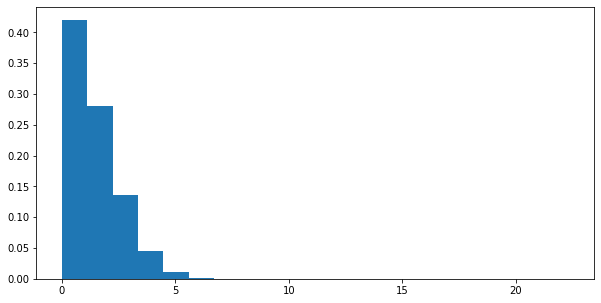

In [54]:
plt.rcParams["figure.figsize"] = (10,5)
plt.hist(T, density=True, bins=20)

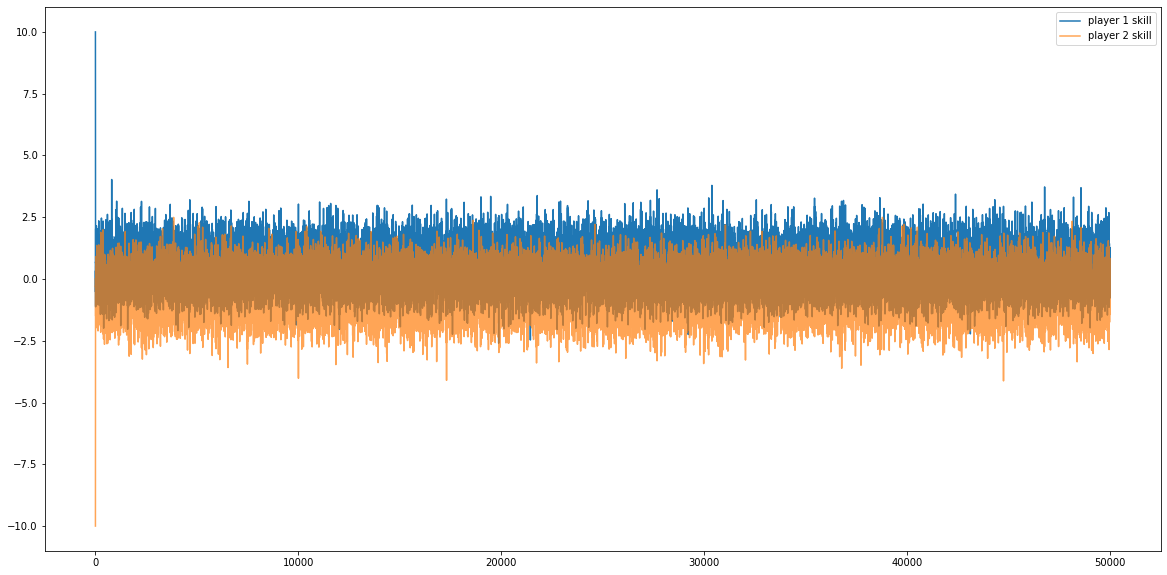

In [55]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(S1, label="player 1 skill")
plt.plot(S2, label="player 2 skill", alpha=0.7)
plt.legend(loc='best')
plt.show()

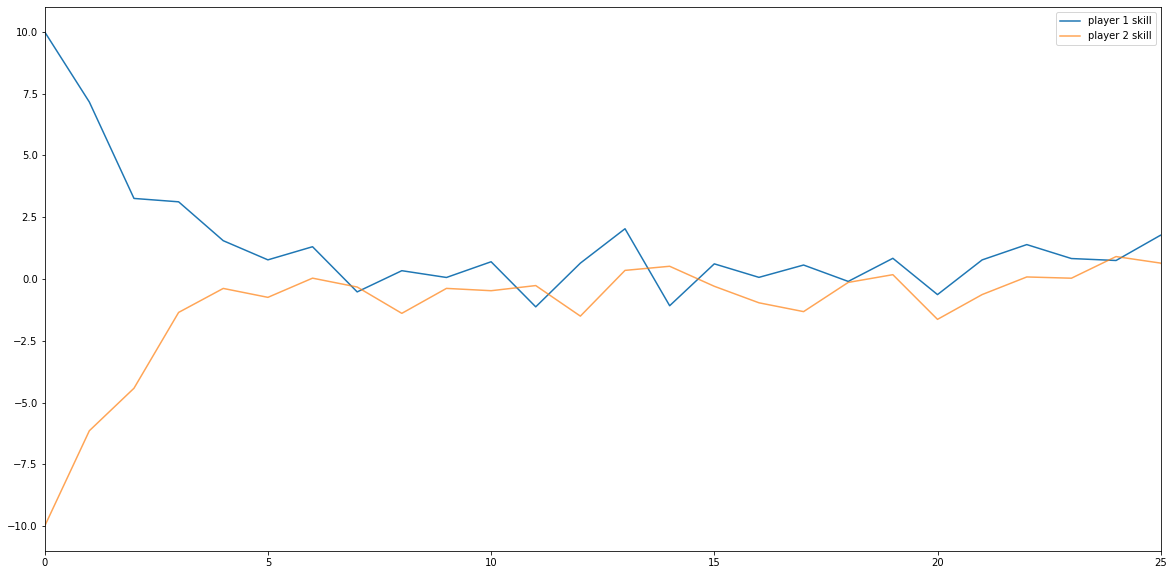

In [56]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(S1, label="player 1 skill")
plt.plot(S2, label="player 2 skill", alpha=0.7)
plt.legend(loc='best')
plt.xlim(0, 25)
plt.show()

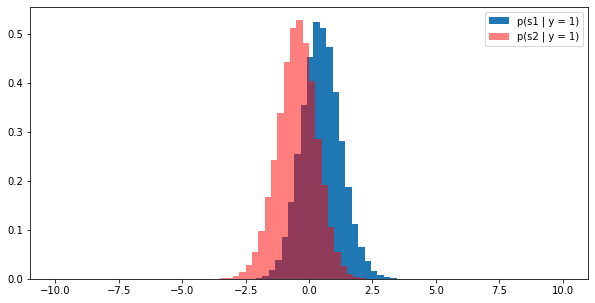

In [57]:
plt.rcParams["figure.figsize"] = (10,5)
plt.hist(S1, density=True, bins = 50, label="p(s1 | y = 1)")
plt.hist(S2, density=True, bins = 50, label="p(s2 | y = 1)", fc=(1, 0, 0, 0.5))
plt.legend()
plt.show()

In [58]:
print(f'est mean S1: {np.mean(S1)}\nest mean S2: {np.mean(S2)}\nest var S1: {np.var(S1)}\nest var S2: {np.var(S2)}')

est mean S1: 0.4865487457399808
est mean S2: -0.4777551762955344
est var S1: 0.581903296465358
est var S2: 0.5885333536636486


The initial values
<br>
s1_0 = 10 
<br>
s2_0 = -10
<br>
<br>
Generates a burn in period of about 5 iterations. A better choice of initial values is to choose the mean of the sampled data points for each player.
<br>
s1_0 = 0.47
<br>
s2_0 = -0.47

## Rerun with new params

In [59]:
#hyperparameters
mu_1 = 0
mu_2 = 0
var_1 = 1
var_2 = 1
var_t = 1

In [60]:
#Initiate s_1 and s_2 as their expected means
s1_0 = 0.47
s2_0 = -0.47

#Initiate t for y = 1 (unnecessary, but keeps len(T) = len(S1) = len(S2))
t0 = truncnorm.rvs(a=-(s1_0 - s2_0)/np.sqrt(var_t), b=np.inf, loc=(s1_0 - s2_0), scale=np.sqrt(var_t))

In [61]:


L = 50000
T = np.zeros(L)
S1 = np.zeros(L)
S2 = np.zeros(L)

T[0] = t0
S1[0] = s1_0
S2[0] = s2_0
m0 = np.array([[mu_1, mu_2]]).T
S0 = np.matrix( [[var_1, 0], [0, var_2]] )
X = np.array([[1, -1]])

Sn = s_n(S0, var_t, X)


for i in range(1, L):
    # p(t_k+1 | s1_k, s2_k, y = 1)
    mu_t = S1[i - 1] - S2[i - 1]
    T[i] = truncnorm.rvs(a=-mu_t/np.sqrt(var_t), b=np.inf, loc=mu_t, scale=np.sqrt(var_t))
    
    #p(s1_k+1, s2_k+1 | t_k+1, y = 1)
    mn = m_n(Sn, S0, m0, var_t, X, T[i])
    S1[i] = np.random.normal(mn[0],Sn[0, 0])
    S2[i] = np.random.normal(mn[1],Sn[1, 1])
    
    
    

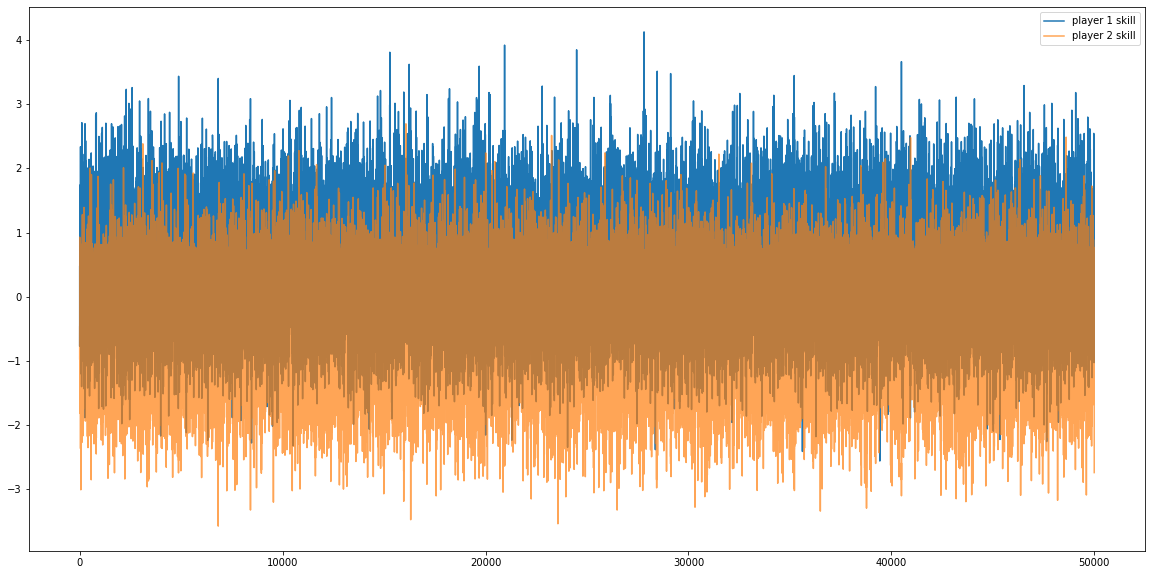

In [62]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(S1, label="player 1 skill")
plt.plot(S2, label="player 2 skill", alpha=0.7)
plt.legend(loc='best')
plt.show()

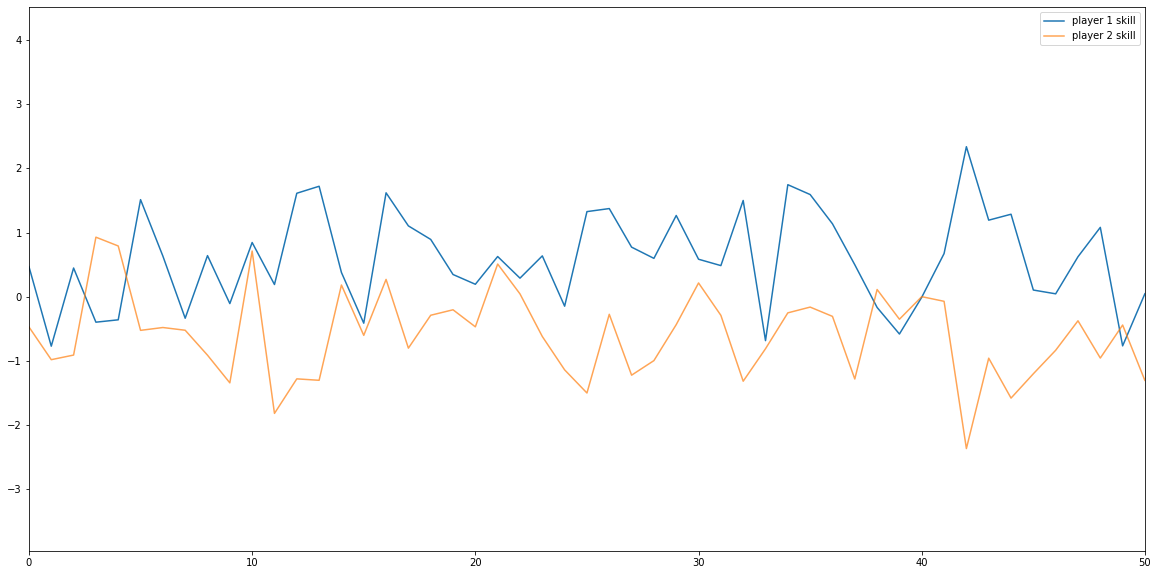

In [63]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(S1, label="player 1 skill")
plt.plot(S2, label="player 2 skill", alpha=0.7)
plt.legend(loc='best')
plt.xlim(0, 50)
plt.show()

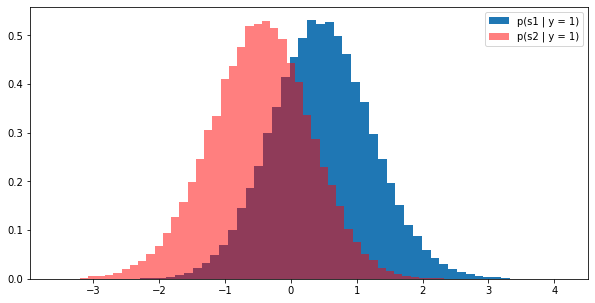

In [64]:
plt.rcParams["figure.figsize"] = (10,5)
plt.hist(S1, density=True, bins = 50, label="p(s1 | y = 1)")
plt.hist(S2, density=True, bins = 50, label="p(s2 | y = 1)", fc=(1, 0, 0, 0.5))
plt.legend()
plt.show()

In [65]:
print(f'est mean S1: {np.mean(S1)}\nest mean S2: {np.mean(S2)}\nest var S1: {np.var(S1)}\nest var S2: {np.var(S2)}')

est mean S1: 0.4756506163588224
est mean S2: -0.47245454509423473
est var S1: 0.5750254165188644
est var S2: 0.5779622094726378


In [66]:
def gauss_approx(data1, data2):
    S0 = np.cov(data1, data2)
    m0 = [np.mean(data1), np.mean(data2)]
    return m0, S0

In [67]:
def normal_pdf(x, mean, var):
    return ( 1 / np.sqrt(2 * np.pi * var) ) * np.exp( ( -1 / ( 2 * var ) ) * ( (x - mean) **2 ) )

In [68]:
est_mean, est_cov = gauss_approx(S1, S2)
print(est_mean)
print(est_cov)

[0.4756506163588224, -0.47245454509423473]
[[ 0.57503692 -0.12936268]
 [-0.12936268  0.57797377]]


# Testing different sample sizes

In [71]:
import time

In [72]:
#hyperparameters
mu_1 = 0
mu_2 = 0
var_1 = 1
var_2 = 1
var_t = 1

In [73]:
#Initiate s_1 and s_2 as their expected means
s1_0 = 0.47
s2_0 = -0.47

#Initiate t for y = 1 (unnecessary, but keeps len(T) = len(S1) = len(S2))
t0 = truncnorm.rvs(a=-(s1_0 - s2_0)/np.sqrt(var_t), b=np.inf, loc=(s1_0 - s2_0), scale=np.sqrt(var_t))

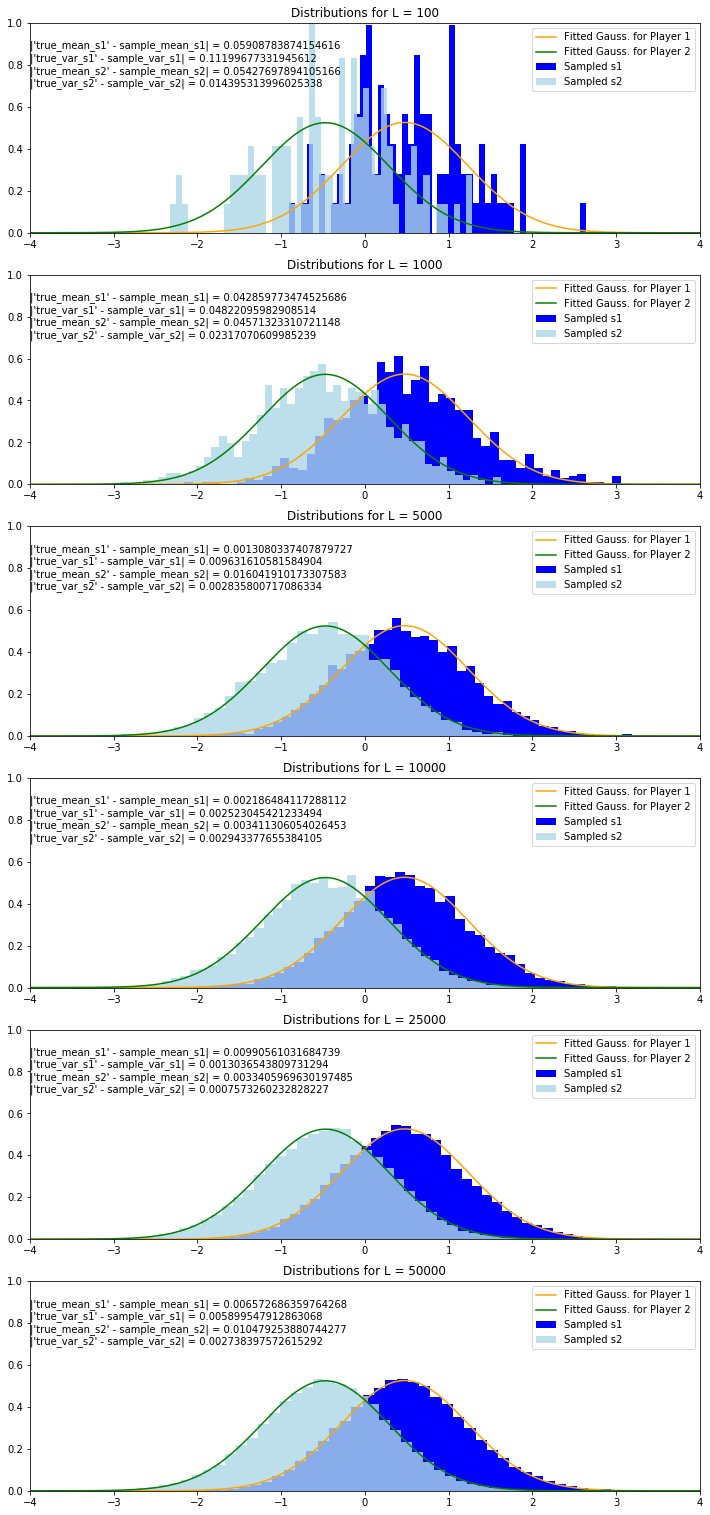

In [74]:
lengths = [100, 1000, 5000, 10000, 25000, 50000]
times = []

fig, axes = plt.subplots(len(lengths),1, figsize=(12,27))

for i, L in enumerate(lengths):
    start = time.time()
    T = np.zeros(L)
    S1 = np.zeros(L)
    S2 = np.zeros(L)

    T[0] = t0
    S1[0] = s1_0
    S2[0] = s2_0
    m0 = np.array([[mu_1, mu_2]]).T
    S0 = np.matrix( [[var_1, 0], [0, var_2]] )
    X = np.array([[1, -1]])

    Sn = s_n(S0, var_t, X)


    for j in range(1, L):
        # p(t_k+1 | s1_k, s2_k, y = 1)
        mu_t = S1[j - 1] - S2[j - 1]
        T[j] = truncnorm.rvs(a=-mu_t/np.sqrt(var_t), b=np.inf, loc=mu_t, scale=np.sqrt(var_t))

        #p(s1_k+1, s2_k+1 | t_k+1, y = 1)
        mn = m_n(Sn, S0, m0, var_t, X, T[j])
        S1[j] = np.random.normal(mn[0],Sn[0, 0])
        S2[j] = np.random.normal(mn[1],Sn[1, 1])
    
    times.append(time.time() - start)
    xv = np.linspace( -4 , 4 ,200)
    
    axes[i].plot(xv ,normal_pdf(xv, est_mean[0], est_cov[0, 0]), label="Fitted Gauss. for Player 1", color="orange")
    axes[i].hist(S1, density=True, bins=50, label="Sampled s1", color="blue")
    
    axes[i].plot(xv ,normal_pdf(xv, est_mean[1], est_cov[1, 1]), label="Fitted Gauss. for Player 2", color="green")
    axes[i].hist(S2, density=True, bins=50, label="Sampled s2", color="lightblue", alpha=0.8)
    
    axes[i].set_title(f'Distributions for L = {L}')
    axes[i].legend(loc="best")
    axes[i].set_xlim(-4, 4)
    axes[i].set_ylim(0, 1)
    axes[i].text(-4,0.7, f"|'true_mean_s1' - sample_mean_s1| = {np.abs(est_mean[0] - np.mean(S1))} \
                        \n|'true_var_s1' - sample_var_s1| = {np.abs(est_cov[0, 0] - np.var(S1))} \
                        \n|'true_mean_s2' - sample_mean_s2| = {np.abs(est_mean[1] - np.mean(S2))} \
                        \n|'true_var_s2' - sample_var_s2| = {np.abs(est_cov[1, 1] - np.var(S2))}")

In [75]:
times

[0.04912567138671875,
 0.48662686347961426,
 2.4687297344207764,
 4.8599560260772705,
 11.539343357086182,
 23.047708988189697]

Text(0, 0.5, 'Time (s)')

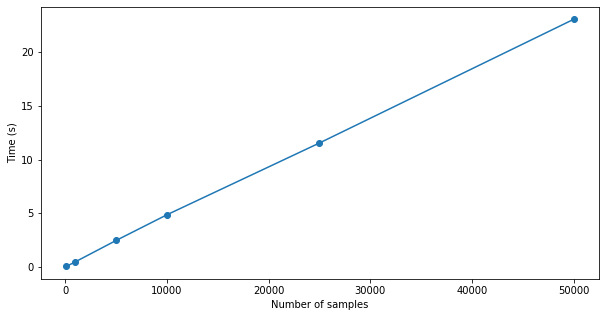

In [76]:
plt.plot(lengths, times, marker = 'o')
plt.xlabel("Number of samples")
plt.ylabel("Time (s)")

We can see that we don't get much in terms of approximating the mean & variance going further than 5000 data points.

p(s_1) = N(0, 1)
p(s_1 | y = 1) = N(0.47, 0.58)
<br>
p(s_2) = N(0, 1)
p(s_2 | y = 1) = N(-0.47, 0.58)
<br>
<br>
In the light of new data, i.e. that player 1 won, we are now more sure that player 1 has a positive skill level since the mean has increased and the variance has shrinked.
<br>
<br>
The same is true for player 2, but in reverse. Now that we know that player 2 lost, we are a little bit more sure that player 2 has a negative skill level

# Q5

In [77]:
import pandas as pd

In [78]:
series_df = pd.read_csv('SerieA.csv')
series_df.count()

yyyy-mm-dd    380
HH:MM         380
team1         380
team2         380
score1        380
score2        380
dtype: int64

In [79]:
series_df.head()

,yyyy-mm-dd,HH:MM,team1,team2,score1,score2
0,2018-08-18,18:00,Chievo,Juventus,2,3
1,2018-08-18,20:30,Lazio,Napoli,1,2
2,2018-08-19,18:00,Torino,Roma,0,1
3,2018-08-19,20:30,Sassuolo,Inter,1,0
4,2018-08-19,20:30,Parma,Udinese,2,2


In [80]:
series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 6 columns):
yyyy-mm-dd    380 non-null object
HH:MM         380 non-null object
team1         380 non-null object
team2         380 non-null object
score1        380 non-null int64
score2        380 non-null int64
dtypes: int64(2), object(4)
memory usage: 17.9+ KB


In [81]:
no_ties_df = series_df.loc[series_df['score1'] != series_df['score2']]
no_ties_df.count()

yyyy-mm-dd    272
HH:MM         272
team1         272
team2         272
score1        272
score2        272
dtype: int64

In [82]:
no_ties_df['result'] = no_ties_df.apply(lambda row: 1 if row.score1 > row.score2 else -1, axis=1)

C:\Users\maxso\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [83]:
no_ties_df.head()

,yyyy-mm-dd,HH:MM,team1,team2,score1,score2,result
0,2018-08-18,18:00,Chievo,Juventus,2,3,-1
1,2018-08-18,20:30,Lazio,Napoli,1,2,-1
2,2018-08-19,18:00,Torino,Roma,0,1,-1
3,2018-08-19,20:30,Sassuolo,Inter,1,0,1
5,2018-08-19,20:30,Empoli,Cagliari,2,0,1


In [118]:
teams_df = no_ties_df[['team1', 'team2']].values.ravel()
teams_df = pd.unique(teams_df)
teams_dict = {t : (25/3, (25/3)**2) for t in teams_df}
teams_dict

{'Chievo': (8.333333333333334, 69.44444444444446),
 'Juventus': (8.333333333333334, 69.44444444444446),
 'Lazio': (8.333333333333334, 69.44444444444446),
 'Napoli': (8.333333333333334, 69.44444444444446),
 'Torino': (8.333333333333334, 69.44444444444446),
 'Roma': (8.333333333333334, 69.44444444444446),
 'Sassuolo': (8.333333333333334, 69.44444444444446),
 'Inter': (8.333333333333334, 69.44444444444446),
 'Empoli': (8.333333333333334, 69.44444444444446),
 'Cagliari': (8.333333333333334, 69.44444444444446),
 'Bologna': (8.333333333333334, 69.44444444444446),
 'Spal': (8.333333333333334, 69.44444444444446),
 'Atalanta': (8.333333333333334, 69.44444444444446),
 'Frosinone': (8.333333333333334, 69.44444444444446),
 'Milan': (8.333333333333334, 69.44444444444446),
 'Parma': (8.333333333333334, 69.44444444444446),
 'Udinese': (8.333333333333334, 69.44444444444446),
 'Sampdoria': (8.333333333333334, 69.44444444444446),
 'Genoa': (8.333333333333334, 69.44444444444446),
 'Fiorentina': (8.333333

In [119]:
def gibbs_sample_one_game(mu_1, var_1, mu_2, var_2, y, iterations):
    # TODO: handle burn in
    var_t = (25/6)**2
    T = np.zeros(iterations)
    S1 = np.zeros(iterations)
    S2 = np.zeros(iterations)

    T[0] = 0 #TODO: what should we use here?
    S1[0] = mu_1
    S2[0] = mu_2
    m0 = np.array([[mu_1, mu_2]]).T
    S0 = np.matrix( [[var_1, 0], [0, var_2]] )
    X = np.array([[1, -1]])

    Sn = s_n(S0, var_t, X)

    for i in range(1, iterations):
        # p(t_k+1 | s1_k, s2_k, y)
        mu_t = S1[i - 1] - S2[i - 1]
        if y == 1:
            T[i] = truncnorm.rvs(a=-mu_t/np.sqrt(var_t), b=np.inf, loc=mu_t, scale=np.sqrt(var_t))
        else:
            T[i] = truncnorm.rvs(a=-np.inf, b=-mu_t/np.sqrt(var_t), loc=mu_t, scale=np.sqrt(var_t))

        #p(s1_k+1, s2_k+1 | t_k+1, y = 1)
        mn = m_n(Sn, S0, m0, var_t, X, T[i])
        S1[i] = np.random.normal(mn[0, 0],Sn[0, 0])
        S2[i] = np.random.normal(mn[1, 0],Sn[1, 1])
    
    
    return gauss_approx(S1, S2)

In [121]:
for i, row in no_ties_df.iterrows():
    team_1 = row['team1']
    team_2 = row['team2']
  #  print('input:')
 #   print(teams_dict[team_1][0], teams_dict[team_2][0])
#    print('-' * 10)
    print(team_1, teams_dict[team_1], team_2, teams_dict[team_2])
    new_mu, new_cov = gibbs_sample_one_game(teams_dict[team_1][0], 
                                            teams_dict[team_1][1],
                                            teams_dict[team_2][0], 
                                            teams_dict[team_2][1],
                                            row['result'], 
                                            1000)
   # print('Output:')
  #  print(new_mu)
 #   print(new_cov)
#    print('-' * 10)
    teams_dict[team_1] = (new_mu[0], new_cov[0, 0])
    teams_dict[team_2] = (new_mu[1], new_cov[1, 1])
    

Chievo (8.333333333333334, 69.44444444444446) Juventus (8.333333333333334, 69.44444444444446)


C:\Users\maxso\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in matmul
  


ValueError: Domain error in arguments.

In [117]:
new_mu, new_cov = gibbs_sample_one_game(25/3, 
                                        (25/3)**2,
                                         25/3, 
                                         (25/3)**2,
                                            1, 
                                            1000)

print(new_mu)
print(new_cov)

[34.728625900880424, -19.739735385178463]
[[2435.23560143 -895.4655439 ]
 [-895.4655439  2427.46294001]]


In [115]:
teams_dict

{'Chievo': (8.333333333333334, 69.44444444444446),
 'Juventus': (8.333333333333334, 69.44444444444446),
 'Lazio': (8.333333333333334, 69.44444444444446),
 'Napoli': (8.333333333333334, 69.44444444444446),
 'Torino': (8.333333333333334, 69.44444444444446),
 'Roma': (8.333333333333334, 69.44444444444446),
 'Sassuolo': (8.333333333333334, 69.44444444444446),
 'Inter': (8.333333333333334, 69.44444444444446),
 'Empoli': (8.333333333333334, 69.44444444444446),
 'Cagliari': (8.333333333333334, 69.44444444444446),
 'Bologna': (8.333333333333334, 69.44444444444446),
 'Spal': (8.333333333333334, 69.44444444444446),
 'Atalanta': (8.333333333333334, 69.44444444444446),
 'Frosinone': (8.333333333333334, 69.44444444444446),
 'Milan': (8.333333333333334, 69.44444444444446),
 'Parma': (8.333333333333334, 69.44444444444446),
 'Udinese': (8.333333333333334, 69.44444444444446),
 'Sampdoria': (8.333333333333334, 69.44444444444446),
 'Genoa': (8.333333333333334, 69.44444444444446),
 'Fiorentina': (8.333333

In [425]:
no_ties_df[no_ties_df['team1'] == 'Chievo']

,yyyy-mm-dd,HH:MM,team1,team2,score1,score2,result
0,2018-08-18,18:00,Chievo,Juventus,2,3,-1
45,2018-09-23,15:00,Chievo,Udinese,0,2,-1
65,2018-09-30,15:00,Chievo,Torino,0,1,-1
84,2018-10-21,15:00,Chievo,Atalanta,1,5,-1
107,2018-11-04,15:00,Chievo,Sassuolo,0,2,-1
187,2018-12-29,15:00,Chievo,Frosinone,1,0,1
203,2019-01-27,12:30,Chievo,Fiorentina,3,4,-1
221,2019-02-08,20:30,Chievo,Roma,0,3,-1
261,2019-03-09,20:30,Chievo,Milan,1,2,-1
279,2019-03-29,20:30,Chievo,Cagliari,0,3,-1


In [426]:
no_ties_df[no_ties_df['team2'] == 'Chievo']

,yyyy-mm-dd,HH:MM,team1,team2,score1,score2,result
15,2018-08-26,20:30,Fiorentina,Chievo,6,1,1
54,2018-09-26,21:00,Genoa,Chievo,2,0,1
74,2018-10-07,15:00,Milan,Chievo,3,1,1
95,2018-10-28,15:00,Cagliari,Chievo,2,1,1
171,2018-12-26,15:00,Sampdoria,Chievo,2,0,1
199,2019-01-21,20:30,Juventus,Chievo,3,0,1
234,2019-02-17,15:00,Udinese,Chievo,1,0,1
253,2019-03-03,12:30,Torino,Chievo,3,0,1
297,2019-04-04,19:00,Sassuolo,Chievo,4,0,1
308,2019-04-08,20:30,Bologna,Chievo,3,0,1
